# SEGUNDO EXAMEN PARCIAL

Usando metodos de ML no supervisado en: K-means, Gaussian Mixture, Cluster jerarquico

# 1) Dataset de Coactivation Matrix
###    * Utilizar  el metodo de codo para determinar el numero de cluster optimo (adecuado)   

In [377]:
import numpy as np
import pandas as pd
import scipy.io as sio
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics import confusion_matrix

### Ya le entendi jaja. Al parecer ejecutamos el KMeans con los datos ya estandarizados y en base a eso obtenemos los valores de incercia para cada numero de clusters. Esto lo graficamos y asi conocemos el numero mas optimo de clusters en base a la incercia ☻

C:\Users\vladi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\vladi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\vladi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\vladi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

Text(0.5, 1.0, 'Método del codo (K-means)')

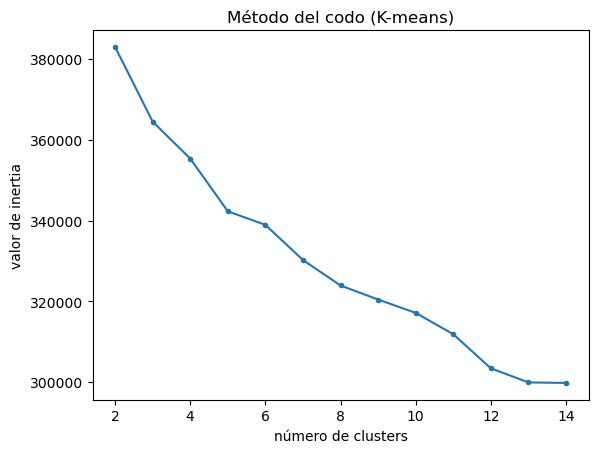

In [379]:
x = r"C:\Users\vladi\Downloads\segundo parcial datos\Coactivation_matrix.mat"

# PASAMOS LOS DATOS A UN FORMATO DE DICCIONARIO
dict = sio.loadmat(x)

# TOMAMOS LOS DATOS DE COACTIVATION MATRIX DEL DICCIONARIO
Coactivation_matrix = dict['Coactivation_matrix']

# LOS TRANSFORMAMOS EN UN DATAFRAME
df = pd.DataFrame(Coactivation_matrix)

# REALIZAMOS LA ESTANDARIZACION DE LOS DATOS (MEDIA=0 Y DESVIACION ESTANDARD= 1)
cm_std = StandardScaler().fit_transform(df)


inertia = []
for no_clusters in range(2, 15):
    kmeans = KMeans(n_clusters=no_clusters)
    kmeans.fit(cm_std)
    inertia.append(kmeans.inertia_)


plt.plot(range(2, 15), inertia, '.-')
plt.xlabel('número de clusters')
plt.ylabel('valor de inertia')
plt.title('Método del codo (K-means)')

## * Usando el numero de clusters encontrado por el metodo del codo, usar k-means y gaussian mixture en este dataset 
EN BASE A LA GRAFICA ANTERIOR ELEGIMOS EL NUMERO DE CLUSTERS QUE CONSIDEREMOS MAS OPTIMO PARA LLEVAR A CABO EL METODO.
Lo unico que realice fue crear un DataFrame con las coordenadas. A este DataFrame le agregue una columna mas con los clusters a los cuales pertenece cada uno de los puntos, despues solo sustitui el numero del cluster de cada punto por el nombre del color para poder marcarlos en el scatter. Cabe señalar que en este caso solo lo hice para tres cluster, si quisiera hacerse con mas solo hay que agregar el numero del cluster y el color en la funcion de sustitucion del DataFrame.

# K-means

C:\Users\vladi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


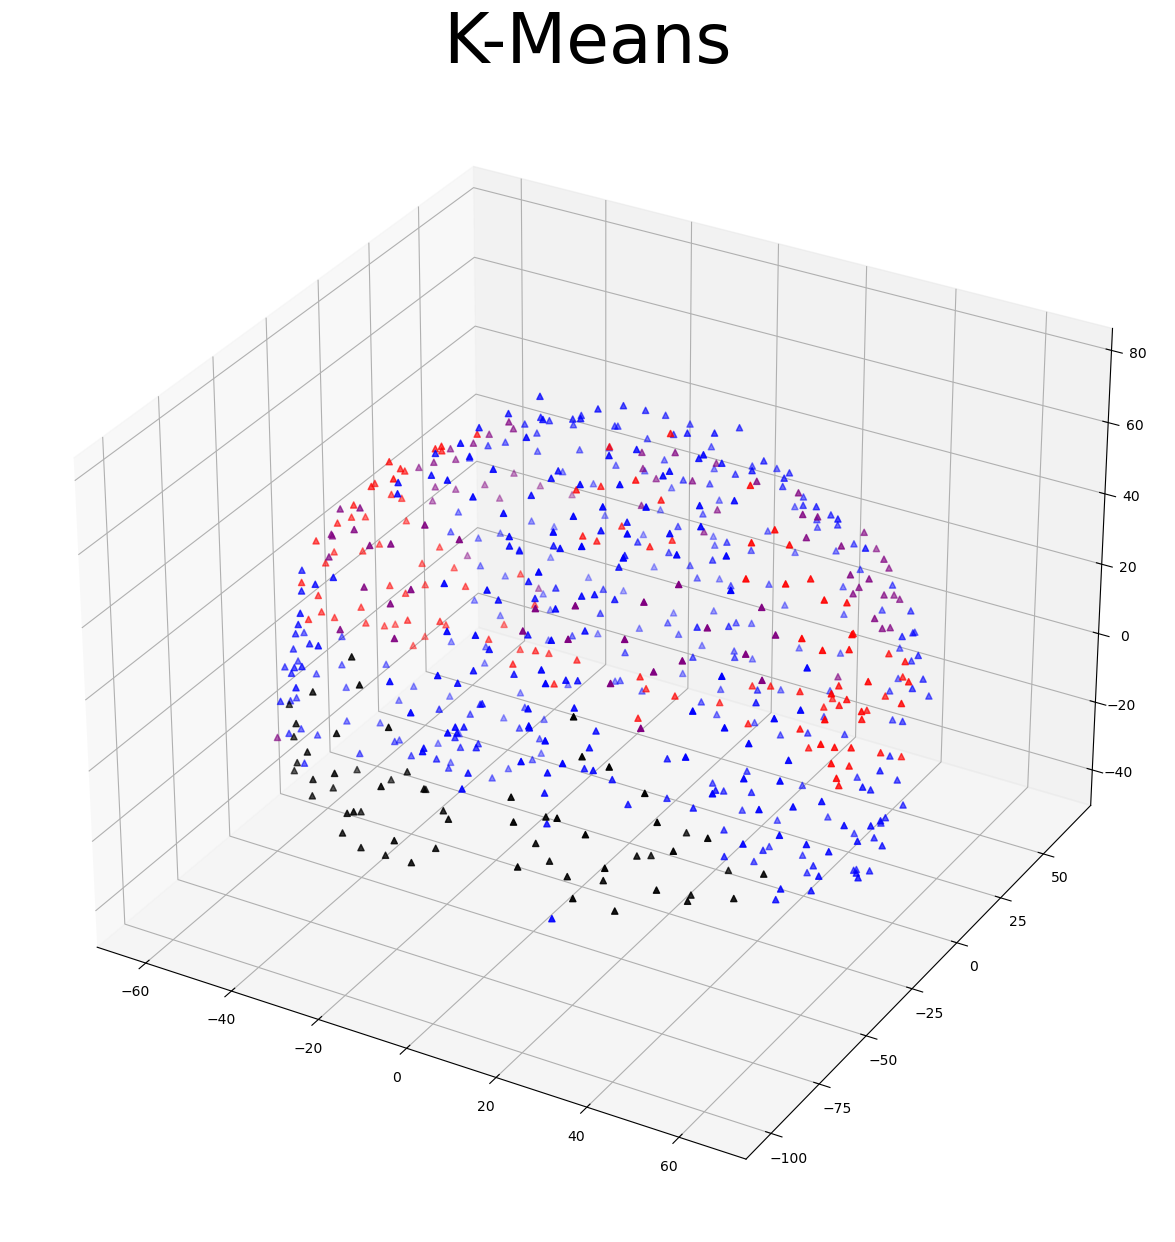

In [382]:
km = KMeans(n_clusters= 4).fit(cm_std)

dict_coord = dict['Coord']
df_coord = pd.DataFrame(dict_coord)

Clusters = pd.DataFrame({"Clusters":km.labels_})
Clusters_color= Clusters.replace([0, 1, 2, 3], ['red', 'blue', 'purple', 'black'])
df_coord['Color'] = Clusters_color['Clusters']

x, y, z = df_coord[0], df_coord[1], df_coord[2]

color = df_coord['Color']

fig1 = plt.figure(figsize= (15, 15))
ax1 = plt.axes(projection= '3d')
plt.title('K-Means', fontsize=50)
ax1.scatter3D(x, y, z, color= color, marker= '^')
plt.show()

# Gaussian Mixture

C:\Users\vladi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


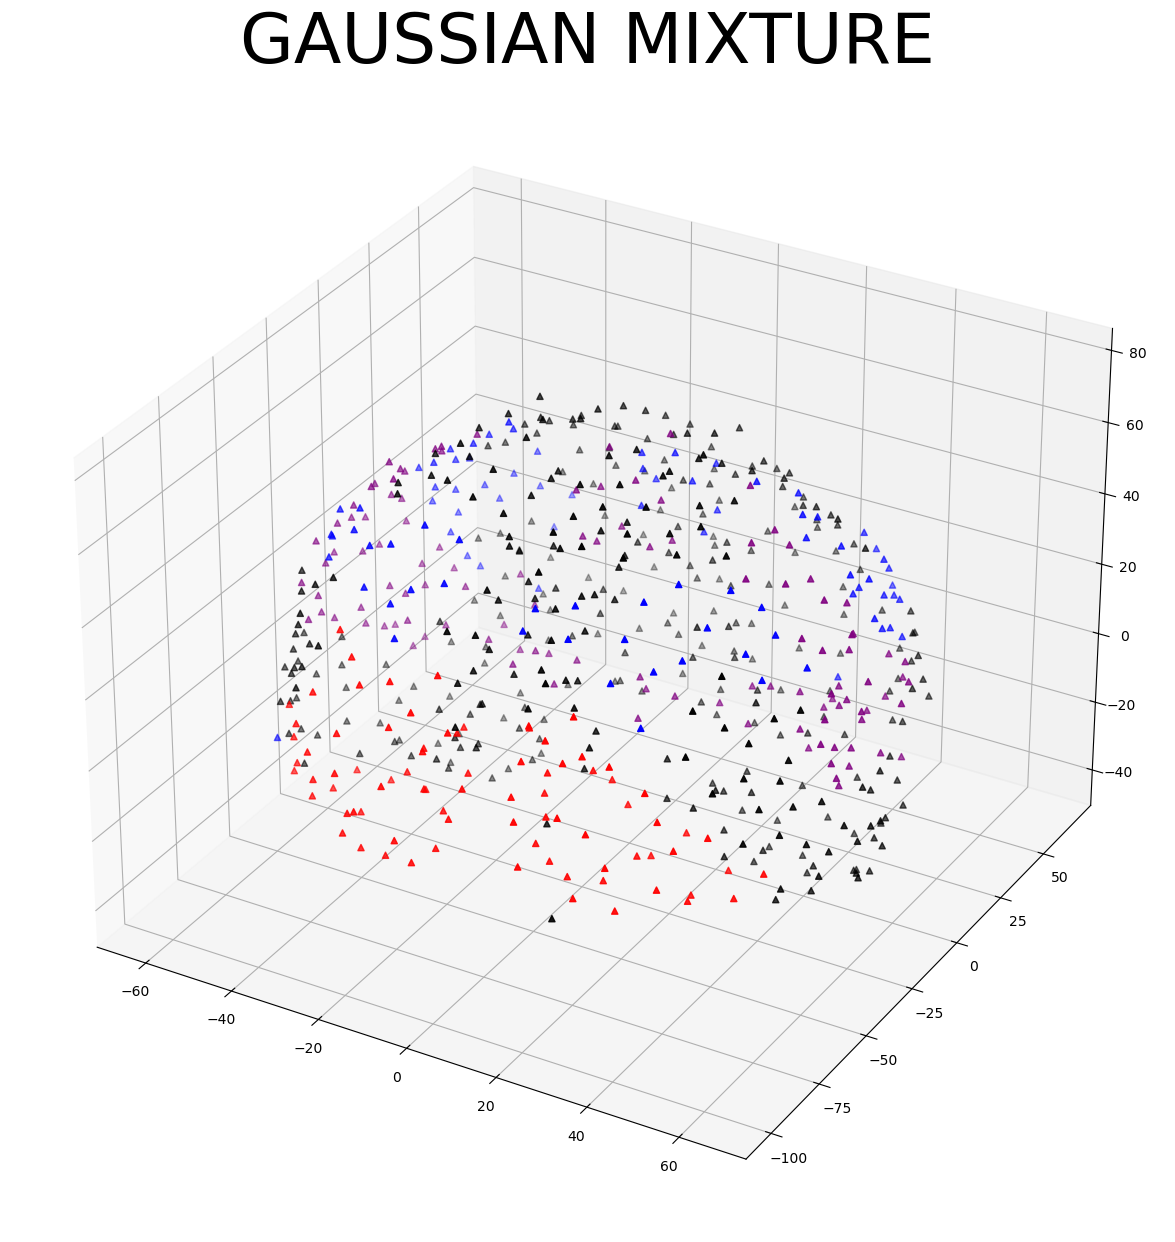

In [384]:
gm = GaussianMixture(n_components=4).fit(cm_std)

gm_Clusters = pd.DataFrame({"Clusters":gm.predict(cm_std)})
Clusters_color= gm_Clusters.replace([0, 1, 2, 3], ['red', 'blue', 'purple', 'black'])
df_coord['Color'] = Clusters_color['Clusters']
color = df_coord['Color']

x, y, z = df_coord[0], df_coord[1], df_coord[2]

fig2 = plt.figure(figsize= (15, 15))
ax2 = plt.axes(projection= '3d')
plt.title('GAUSSIAN MIXTURE', fontsize=50)
ax2.scatter3D(x, y, z, color= color, marker= '^')
plt.show()

# CLUSTER JERARQUICO

<function matplotlib.pyplot.show(close=None, block=None)>

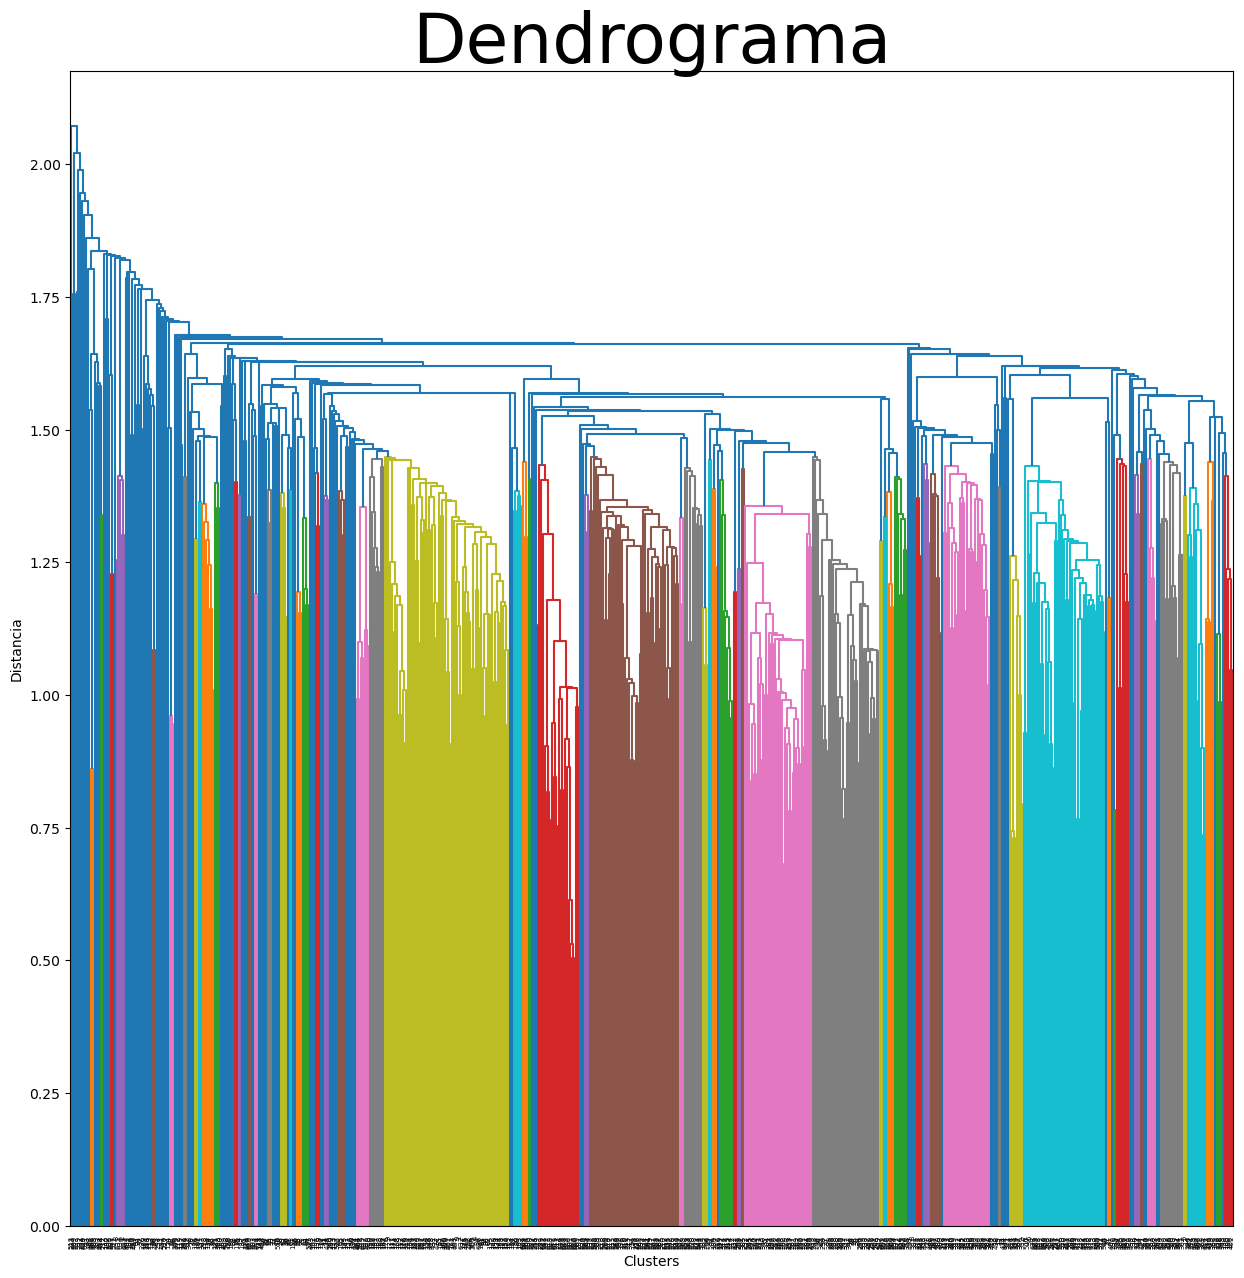

In [386]:
matriz_similitud = cosine_similarity(cm_std)
matriz_vinculacion = linkage(matriz_similitud, method= 'single')
plt.figure(figsize= (15, 15))
plt.title('Dendrograma', fontsize=50)
plt.xlabel('Clusters')
plt.ylabel('Distancia')
dendrogram(matriz_vinculacion)
plt.show

# 2) Brain Tumor
###    A) Utilizar el método de codo para determinar el número de cluster óptimo (adecuado)

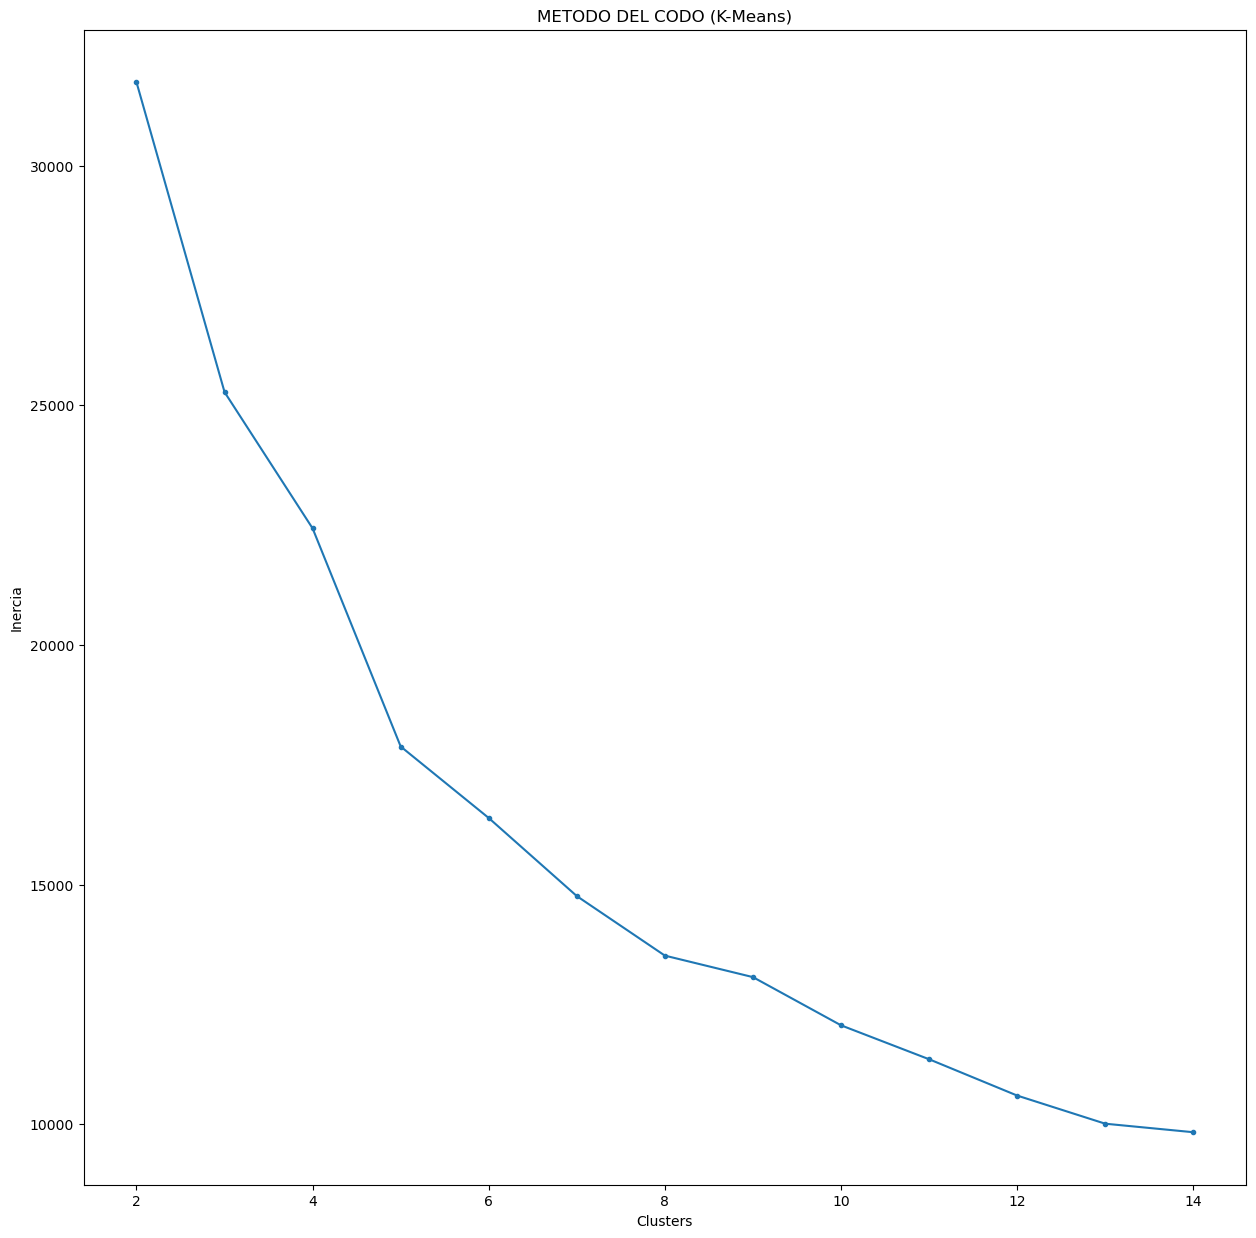

In [388]:
archivo = r"C:\Users\vladi\Downloads\segundo parcial datos\Brain Tumor.csv"
df= pd.read_csv(archivo)
data= df.iloc[:, 2:-1]

brain_tumor_std = StandardScaler().fit_transform(data)

inertia = []
for n in range(2, 15):
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(brain_tumor_std)
    inertia.append(kmeans.inertia_)

plt.figure(figsize= (15, 15))
plt.plot(range(2, 15), inertia, '.-')
plt.title('METODO DEL CODO (K-Means)')
plt.xlabel('Clusters')
plt.ylabel('Inercia')
plt.show()

### EN MI HUMILDE OPINION CONSIDERO QUE 4, 5, 8 Y 10 SON BUENOS NUMEROS DE CLUSTERS

### B) Utilizar 2 cluster con cada método (k-means, gaussian clusters y cluster jerárquico) y calcular la matriz de confusión de cada método usando la columna 'Class' como groundthruth

#### K-Means
LO HICE SOLO CON 50 IMAGENES PARA PODER VER TANTO EL DATAFRAME COMO EL HEATMAP Y PODER COMPARAR LOS RESULTADOS.

<Axes: >

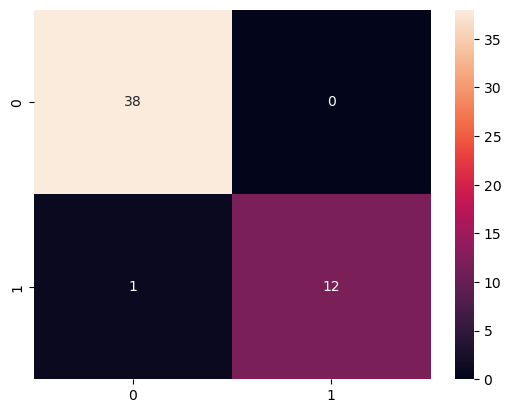

In [392]:
km = KMeans(n_clusters= 2).fit(brain_tumor_std)
df = pd.read_csv(archivo)
KMEANS = df.iloc[:, 0:2]
KMEANS['Cluster'] = km.labels_
KMEANS = KMEANS.iloc[:51, 1:3]

cm_km = confusion_matrix(KMEANS.Class, KMEANS['Cluster'], labels=KMEANS.Class.unique())

sns.heatmap(cm_km, annot=True)

In [393]:
KMEANS

,Class,Cluster
0,0,0
1,0,0
2,1,1
3,1,1
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,1,1


#### Gaussian Mixture

<Axes: >

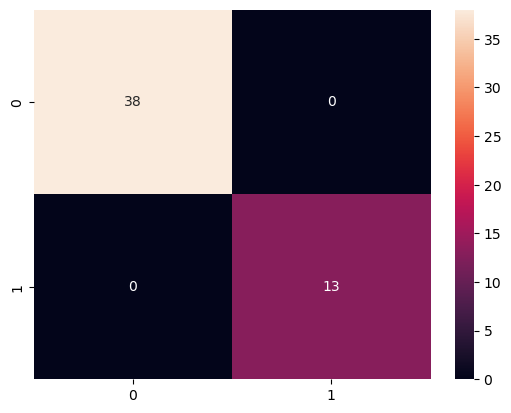

In [395]:
archivo = r"C:\Users\vladi\Downloads\segundo parcial datos\Brain Tumor.csv"
df= pd.read_csv(archivo)
data= df.iloc[:51, :2]
gm = GaussianMixture(n_components=2).fit(brain_tumor_std)
GM = pd.DataFrame({"Clusters":gm.predict(brain_tumor_std)})
data['Cluster']= GM
cm_gm = confusion_matrix(data.Class, data['Cluster'], labels=data.Class.unique())

sns.heatmap(cm_gm, annot=True)

In [396]:
data

,Image,Class,Cluster
0,Image1,0,0
1,Image2,0,0
2,Image3,1,1
3,Image4,1,1
4,Image5,0,0
5,Image6,0,0
6,Image7,0,0
7,Image8,0,0
8,Image9,0,0
9,Image10,1,1


#### Cluster jerarquico (a este no le entendi muy bien como hacer la matriz de confusion)

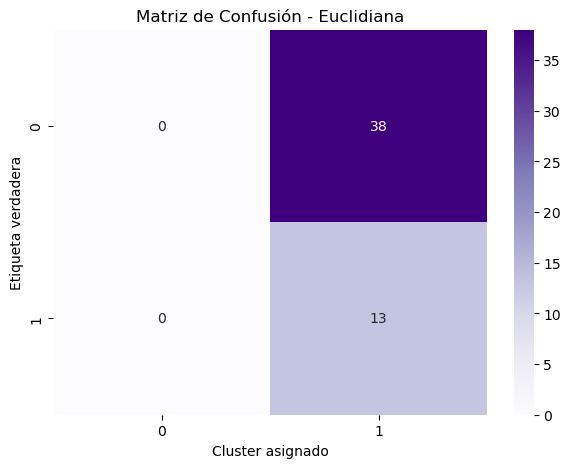

In [461]:
brain_tumor_std_50 = brain_tumor_std[:51,:]
matriz_similitud = cosine_similarity(brain_tumor_std_50)
matriz_vinculacion = linkage(matriz_similitud, method= 'single')
y_pred_euclid = fcluster(matriz_vinculacion, t=3.14, criterion='distance')

conf_euclid = confusion_matrix(data['Class'][:51], y_pred_euclid)

plt.figure(figsize=(7,5))
sns.heatmap(conf_euclid, annot=True, fmt='d', cmap='Purples')
plt.title("Matriz de Confusión - Euclidiana")
plt.xlabel("Cluster asignado")
plt.ylabel("Etiqueta verdadera")
plt.show()

### C)¿qué método recomendarías para este dataset?, ¿por qué?

En general creo que depende mucho del contexto, pero el metodo de K-means es bastaste bueno. La mayoria de las predicciones que realizo fueron excelentes y ademas es bastante comodo de utilizar.

# 3)De su previa investigación:

### Accuracy (exactitud)
Es qué tan seguido tu modelo acierta en general.
O sea, de todas las veces que hizo una predicción, ¿cuántas veces le atinó?


### Precision (precisión)
Es de todas las veces que tu modelo dijo “esto es positivo” (por ejemplo, un tumor), ¿cuántas veces fue verdad?

### Recall (sensibilidad)
Es de todos los casos que sí eran positivos, ¿cuántos encontró el modelo?

### F1-score
Es como un “promedio equilibrado” entre precision y recall.
Sirve mucho cuando hay pocos datos de una clase o cuando te importa tener buen balance entre no fallar y no inventar cosas.


La matriz de confusión te da los numeritos base. Con los cuales puedes calcular precision, recall, accuracy y F1-score. Te ayuda a entender si tu modelo acierta por suerte, se inventa cosas, o se le escapan casos importantes.

# 5) A partir del resultado de 2.B, calcular precision, accuracy, recall y f1-score
Utilice los resultados del metodo K-means

In [481]:
accuracy = accuracy_score(KMEANS.Class, KMEANS['Cluster'])
precision = precision_score(KMEANS.Class, KMEANS['Cluster'], average='binary')
recall = recall_score(KMEANS.Class, KMEANS['Cluster'], average='binary')
f1 = f1_score(KMEANS.Class, KMEANS['Cluster'], average='binary')

print("\nMétricas:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")


Métricas:
Accuracy: 0.9803921568627451
Precision: 1.0
Recall: 0.9230769230769231
F1-score: 0.96
